# Analysis and visualization of M&M taste test

In [1]:
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load participant data

In [2]:
participants = pd.read_csv('data/participants.txt',sep='\t')
participants.head()

,participant_id,continent_of_origin
0,1,North America
1,2,Europe
2,3,North America
3,4,Europe
4,5,Europe


In [3]:
# mapping of participant to continent
p2c = dict(participants.values)

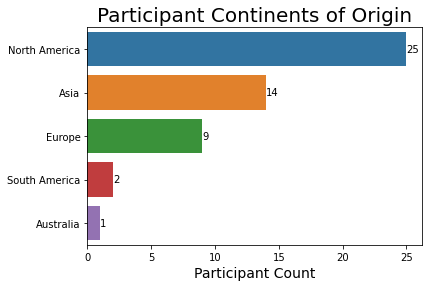

In [4]:
# plot the distriubtion of particpants across continents
con_counts = participants['continent_of_origin'].value_counts()

ax = sns.barplot(y=con_counts.keys(),x=con_counts.values)
ax.bar_label(ax.containers[0])
plt.xlabel("Participant Count", fontsize=14)
plt.title("Participant Continents of Origin",fontsize=20)
plt.show()

In [71]:
# separate counts by those collected in Denmark vs US
participants['data_collection'] = participants['participant_id'].apply(
    lambda x: "collected in Lyngby" if x <=18 else "collected in Seattle"
)
participants['continent_adj'] = participants['continent_of_origin'].apply(lambda x: 'Aus/SA' if x in ['Australia','South America'] else x)

participants.head()

,participant_id,continent_of_origin,data_collection,continent_adj
0,1,North America,collected in Lyngby,North America
1,2,Europe,collected in Lyngby,Europe
2,3,North America,collected in Lyngby,North America
3,4,Europe,collected in Lyngby,Europe
4,5,Europe,collected in Lyngby,Europe


In [6]:
alt.Chart(participants).mark_bar().encode(
    alt.Y("continent_of_origin:N"),
    alt.X("count(continent_of_origin)"),
    alt.Color("continent_of_origin:N"),
    alt.Row("data_collection:N"),
)

alt.Chart(...)

In [7]:
bars = alt.Chart(participants).mark_bar().encode(
    x=alt.X('count(continent_of_origin)',
            title="Count of participants ",
            axis=alt.Axis(titleFontSize=12)),
    y=alt.Y('continent_of_origin',title="",sort='-x',axis=alt.Axis(labelFontSize=14)),
    color=alt.Color('data_collection:N',title="",legend=alt.Legend(
        orient='none',
        legendX=180, legendY=115,
        direction='vertical',
        titleAnchor='middle',
        strokeColor='black',
        padding=2)),    
    tooltip=['continent_of_origin','data_collection','count(continent_of_origin)']
).properties(width=300,height=150,title="Continental origin of participants")


text_indiv = alt.Chart(participants).mark_text(dx=1,align='left',size=12).encode(
     x=alt.X('count(continent_of_origin)').stack('zero'),
     y=alt.Y('continent_of_origin',title="",sort='-x',axis=alt.Axis(labelFontSize=14)),
    detail='data_collection:N',
    color='data_collection',
    text=alt.Text('count(continent_of_origin):Q')
)

bars + text_indiv

alt.LayerChart(...)

## Load M&M id data

In [8]:
# load M&M id data
mnms = pd.read_csv('data/mnm.txt',sep='\t')
mnms.head()

,mnm_id,origin
0,1,USA
1,2,Denmark


In [9]:
# mapping of mnm id to origin
m2o = dict(mnms.values)
m2o

{1: 'USA', 2: 'Denmark'}

## Load taste experiment data

In [10]:
# load taste experiemnt data
df = pd.read_csv('data/taste_data.txt',sep='\t').fillna("")
df.head()

,participant_id,mnm_id,mnm_color,taste_response,notes
0,1,2,green,normal,
1,1,1,orange,bad,
2,1,1,blue,normal,
3,1,2,brown,normal,
4,1,1,yellow,bad,


In [12]:
# add continent and mnm ID column
df['continent'] = df['participant_id'].apply(lambda x: p2c[x])
df['mnm_origin'] = df['mnm_id'].apply(lambda x: m2o[x])
df.head()

,participant_id,mnm_id,mnm_color,taste_response,notes,continent,mnm_origin
0,1,2,green,normal,,North America,Denmark
1,1,1,orange,bad,,North America,USA
2,1,1,blue,normal,,North America,USA
3,1,2,brown,normal,,North America,Denmark
4,1,1,yellow,bad,,North America,USA


## What is the overall taste evalution of M&Ms purchased in Denmark vs purchased in the USA?
For now, we disregard participant continent of origin

In [13]:
order = ['bad','normal','good']

alt.Chart(df).mark_bar(size=90).encode(
    x=alt.X('mnm_origin:N',title="M&M origin",axis=alt.Axis(labelAngle=0)),
    y=alt.Y('count(taste_response)',title="Percent of Responses").stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending')
).properties(width=210)

alt.Chart(...)

Overall, more participants reported European-sourced M&M's as tasting "good," but also as tasting "bad". USA-sourced M&M's were more commonly reported to taste "normal" than either "good" or "bad."

### Combine Australia/South America groups
To help condense the charts and "preserve privacy"

In [14]:
df['continent_adj'] = df['continent'].apply(lambda x: 'Aus/SA' if x in ['Australia','South America'] else x)
df

,participant_id,mnm_id,mnm_color,taste_response,notes,continent,mnm_origin,continent_adj
0,1,2,green,normal,,North America,Denmark,North America
1,1,1,orange,bad,,North America,USA,North America
2,1,1,blue,normal,,North America,USA,North America
3,1,2,brown,normal,,North America,Denmark,North America
4,1,1,yellow,bad,,North America,USA,North America
...,...,...,...,...,...,...,...,...
505,52,1,red,good,,Europe,USA,Europe
506,52,2,red,bad,,Europe,Denmark,Europe
507,52,1,brown,bad,,Europe,USA,Europe
508,52,2,brown,good,,Europe,Denmark,Europe


## Do participants from different continents percieve M&M's differently?

In [15]:
order = ['bad','normal','good']

alt.Chart(df).mark_bar(size=40).encode(
    x=alt.X('mnm_origin:N',title="M&M origin",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses").stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('continent_adj:N',title='',header=alt.Header(labelFontSize=18),sort='descending'),
    tooltip=['continent_adj','taste_response','mnm_origin','count(taste_response)']
).properties(width=100)

alt.Chart(...)

In [16]:
df_filt = df[df['continent_adj'] != 'Aus/SA']
order = ['bad','normal','good']

alt.Chart(df_filt).mark_bar(size=40).encode(
    x=alt.X('continent_adj:N',title="Participant continent",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses").stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('mnm_origin:N',title='M&M Origin',header=alt.Header(labelFontSize=18),sort='descending'),
    tooltip=['continent_adj','taste_response','mnm_origin','count(taste_response)']
).properties(width=170)

alt.Chart(...)

Almost 50% of the time a European participant evaluated a USA-sourced M&M, they reported it tasting "bad."

Almost 50% of the time a North American participant evaluated a Denmark-sourced M&M, they reported it tasting "good."

### Selectable legend to filter taste response group

In [17]:
order = ['bad','normal','good']

#selector = alt.selection_single(encodings=['x', 'color'])
selection = alt.selection_multi(fields=['taste_response'], bind='legend')

alt.Chart(df).mark_bar(size=40).encode(
    x=alt.X('mnm_origin:N',title="M&M origin",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Count of Responses"),#.stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste"
                   ).scale(scheme='brownbluegreen',
                           domain=order),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('continent_adj:N',title='',header=alt.Header(labelFontSize=18),sort='descending'),
    tooltip=['continent_adj','taste_response','mnm_origin','count(taste_response)']
).properties(width=100).add_selection(
    selection
).transform_filter(
    selection
)

/Users/erinwilson/miniconda3/envs/pytu_prac/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Users/erinwilson/miniconda3/envs/pytu_prac/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

## Is there a difference in taste reponse to M&M's of different colors?

In [18]:
alt.Chart(df).mark_bar(size=35).encode(
    x=alt.X('mnm_origin:N',title="M&M origin",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses").stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('mnm_color:N',title='',header=alt.Header(labelFontSize=18))
).properties(width=80)

alt.Chart(...)

In [19]:
alt.Chart(df).mark_bar(size=25).encode(
    x=alt.X('mnm_color:N',title="M&M color",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses").stack('normalize'),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('mnm_origin:N',title='M&M Origin',header=alt.Header(labelFontSize=10))
).properties(width=190)

alt.Chart(...)

### Sampling distribution of M&Ms of different colors

In [20]:
alt.Chart(df).mark_bar(size=25).encode(
    x=alt.X('mnm_color:N',title="M&M color",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="Percent of Responses"),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('mnm_origin:N',title='M&M Origin',header=alt.Header(labelFontSize=10)),
    tooltip=['taste_response','count(taste_response)']
).properties(width=190)

alt.Chart(...)

Most M&M colors were sampled fairly evenly, however there appears to be a skew towards an increased frequency of Blue M&M samples when experimenters drew from the USA-sourced M&M bag.

In [21]:
alt.Chart(df).mark_bar(size=25).encode(
    x=alt.X('mnm_origin:N',title="M&M Origin",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(taste_response)',title="").stack("normalize"),
    color=alt.Color('taste_response:N',sort=order,title="Taste").scale(scheme='brownbluegreen'),
    order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('mnm_color:N',title='M&M Color',header=alt.Header(labelFontSize=10)),
    row=alt.Row('continent_adj:N',title='Percent of Responses',sort='descending'),
    tooltip=[alt.Tooltip('continent_adj',title="Participant continent"),'taste_response','count(taste_response)']
).properties(width=75,height=75)

alt.Chart(...)

## contingency table?

In [22]:
table_count = df.groupby(['mnm_origin','continent_adj'])['taste_response'].value_counts()
table_perc = df.groupby(['mnm_origin','continent_adj'])['taste_response'].value_counts(normalize=True)
table = pd.concat([table_count,table_perc], axis=1, keys=['count', 'percentage'])

In [23]:
table

count  percentage
mnm_origin continent_adj taste_response                   
Denmark    Asia          good               27    0.385714
                         bad                24    0.342857
                         normal             19    0.271429
           Aus/SA        normal             11    0.733333
                         bad                 4    0.266667
           Europe        normal             17    0.377778
                         good               16    0.355556
                         bad                12    0.266667
           North America good               57    0.456000
                         normal             37    0.296000
                         bad                31    0.248000
USA        Asia          normal             30    0.428571
                         good               21    0.300000
                         bad                19    0.271429
           Aus/SA        normal             10    0.666667
                         good                3    0.200000
                         bad                 2    0.133333
           Europe        bad                22    0.488889
                         normal             15    0.333333
                         good                8    0.177778
           North America normal             60    0.480000
                         good               48    0.384000
                         bad                17    0.136000

In [24]:
alt.Chart(df).mark_bar(size=25).encode(
    x=alt.X('taste_response:N',title="M&M Origin",axis=alt.Axis(labelAngle=0,labelFontSize=10)),
    y=alt.Y('count(mnm_origin)',title=""),
    color=alt.Color('mnm_origin:N',title="origin").scale(scheme='brownbluegreen'),
    #order=alt.Order('color_taste_response_sort_index:Q',sort='descending'),
    column=alt.Column('continent_adj:N',title='Continent',header=alt.Header(labelFontSize=10)),
    #row=alt.Row('continent_adj:N',title='Percent of Responses')
).properties(width=105,height=75)

alt.Chart(...)

In [25]:
alt.Chart(df).mark_bar().encode(
    alt.Y("count(taste_response):N"),#stack=False),
    alt.X("taste_response",sort=order),
    alt.Color("mnm_origin:N"),
    alt.Column("continent_adj:N"),
    alt.Row('mnm_origin')
).properties(height=100)

alt.Chart(...)

In [26]:
#table.reset_index()
table2 = pd.DataFrame()
table2['mnm_origin'] = table.index.get_level_values(0)
table2['continent'] = table.index.get_level_values(1)
table2['taste_response'] = table.index.get_level_values(2)
table2['count'] = table['count'].values
table2['percentage'] = table['percentage'].values
table2

,mnm_origin,continent,taste_response,count,percentage
0,Denmark,Asia,good,27,0.385714
1,Denmark,Asia,bad,24,0.342857
2,Denmark,Asia,normal,19,0.271429
3,Denmark,Aus/SA,normal,11,0.733333
4,Denmark,Aus/SA,bad,4,0.266667
5,Denmark,Europe,normal,17,0.377778
6,Denmark,Europe,good,16,0.355556
7,Denmark,Europe,bad,12,0.266667
8,Denmark,North America,good,57,0.456000
9,Denmark,North America,normal,37,0.296000


In [27]:
alt.Chart(table2).mark_bar().encode(
    alt.Y("percentage:Q"),#stack=False),
    alt.X("taste_response",sort=order),
    alt.Color("mnm_origin:N"),
    alt.Column("continent:N"),
    alt.Row('mnm_origin')
).properties(height=100)

alt.Chart(...)

In [28]:
alt.Chart(df).mark_bar().encode(
    alt.Y("count(taste_response):N"),
    alt.X("mnm_origin",sort=order),
    alt.Color("mnm_origin:N"),
    alt.Column("taste_response:N",sort=order),
    alt.Row('continent_adj')
).properties(
    height=50,
)

alt.Chart(...)

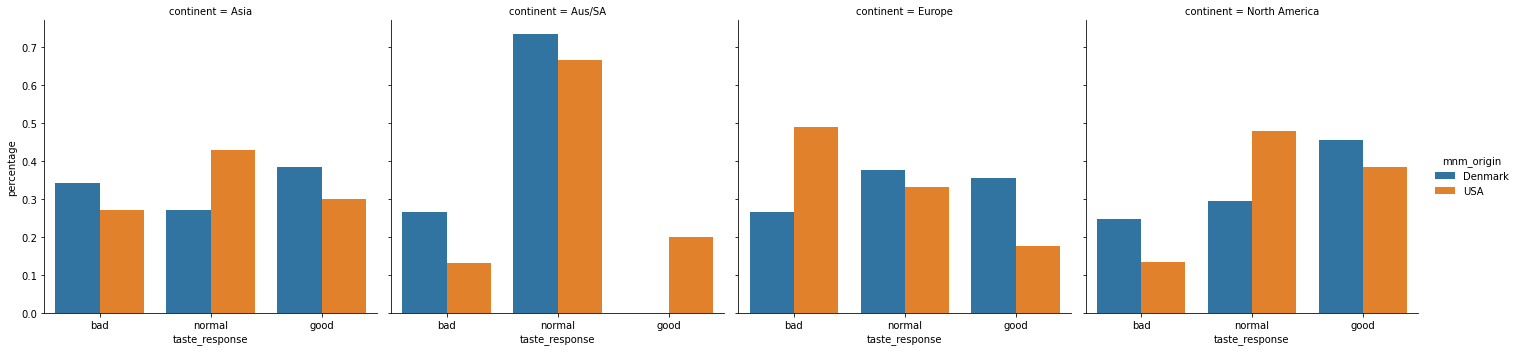

In [29]:
sns.catplot(data=table2, x='taste_response',y='percentage',
            hue='mnm_origin',col="continent",kind='bar',order=order)

## Chi-squared test for distribution differences

In [30]:
from scipy.stats import chi2_contingency
 
# # defining the table
# data = [[207, 282, 241], [234, 242, 232]]
# stat, p, dof, expected = chi2_contingency(data)
 
# # interpret p-value
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')

In [31]:
# achieve same contingency table but with less indexin reseting...?
subt = table2[(table2['mnm_origin']=="USA") & 
               (table2['continent'].isin(["Europe","North America"]))]

t1 = subt.groupby(['continent','taste_response'])['count'].aggregate('mean').unstack()
t2 = subt.pivot(index=['continent','mnm_origin'],
                 columns=['taste_response']
                ).fillna(0)['count'].reset_index()#,columns='count')#['count'].aggregate('mean').unstack()
display(t1)
display(t2)

taste_response,bad,good,normal
continent,,,
Europe,22.0,8.0,15.0
North America,17.0,48.0,60.0


taste_response,continent,mnm_origin,bad,good,normal
0,Europe,USA,22,8,15
1,North America,USA,17,48,60


In [32]:
def chi_same_mnm_compare_continents(cont_table, mnm,groups):
    print("\n___________________________")
    print(f"Analyzing {groups} groups on M&M's from {mnm}")
    
    sub_table = cont_table[(cont_table['mnm_origin']==mnm) & 
               (cont_table['continent'].isin(groups))]

    # origin.groupby(['label', 'type'])['value'].aggregate('mean').unstack()
    # the aggregate doesn't do anything... can I remove and still use unstack?
    sub_table = sub_table.groupby(['continent','taste_response']
                                 )['count'].aggregate('mean').unstack()
    display(sub_table)
    
    stat, p, dof, expected = chi2_contingency(sub_table.values)
    
    print(f"stat: {stat} | p: {p} | degfree: {dof}")
    print("expectation table:")
    display(expected)

    # interpret p-value
    compare_string = f"\nComparing participants from {groups} on their evaluation of M&M's from {mnm}, we find them statistically "
    alpha = 0.05
    if p <= alpha:
        print(compare_string + f'Dependent (reject H0, {p:.3E} <= {alpha})')
    else:
        print(compare_string + f'Independent (H0 holds true, {p:.3f} > {alpha})')


In [33]:
mnms = ['Denmark','USA']
groups = [
    ("Europe","North America"),
    ("Europe","Asia"),
    ("North America","Asia"),
]

for m in mnms:
    for (c1,c2) in groups:
        chi_same_mnm_compare_continents(table2,m,[c1,c2])


___________________________
Analyzing ['Europe', 'North America'] groups on M&M's from Denmark


taste_response,bad,good,normal
continent,,,
Europe,12.0,16.0,17.0
North America,31.0,57.0,37.0


stat: 1.5196193907262532 | p: 0.46775543456848623 | degfree: 2
expectation table:


array([[11.38235294, 19.32352941, 14.29411765],
       [31.61764706, 53.67647059, 39.70588235]])


Comparing participants from ['Europe', 'North America'] on their evaluation of M&M's from Denmark, we find them statistically Independent (H0 holds true, 0.468 > 0.05)

___________________________
Analyzing ['Europe', 'Asia'] groups on M&M's from Denmark


taste_response,bad,good,normal
continent,,,
Asia,24.0,27.0,19.0
Europe,12.0,16.0,17.0


stat: 1.5642047085845534 | p: 0.45744329180308263 | degfree: 2
expectation table:


array([[21.91304348, 26.17391304, 21.91304348],
       [14.08695652, 16.82608696, 14.08695652]])


Comparing participants from ['Europe', 'Asia'] on their evaluation of M&M's from Denmark, we find them statistically Independent (H0 holds true, 0.457 > 0.05)

___________________________
Analyzing ['North America', 'Asia'] groups on M&M's from Denmark


taste_response,bad,good,normal
continent,,,
Asia,24.0,27.0,19.0
North America,31.0,57.0,37.0


stat: 2.0404090909090904 | p: 0.3605211896600571 | degfree: 2
expectation table:


array([[19.74358974, 30.15384615, 20.1025641 ],
       [35.25641026, 53.84615385, 35.8974359 ]])


Comparing participants from ['North America', 'Asia'] on their evaluation of M&M's from Denmark, we find them statistically Independent (H0 holds true, 0.361 > 0.05)

___________________________
Analyzing ['Europe', 'North America'] groups on M&M's from USA


taste_response,bad,good,normal
continent,,,
Europe,22.0,8.0,15.0
North America,17.0,48.0,60.0


stat: 23.84621896621896 | p: 6.635281376879728e-06 | degfree: 2
expectation table:


array([[10.32352941, 14.82352941, 19.85294118],
       [28.67647059, 41.17647059, 55.14705882]])


Comparing participants from ['Europe', 'North America'] on their evaluation of M&M's from USA, we find them statistically Dependent (reject H0, 6.635E-06 <= 0.05)

___________________________
Analyzing ['Europe', 'Asia'] groups on M&M's from USA


taste_response,bad,good,normal
continent,,,
Asia,19.0,21.0,30.0
Europe,22.0,8.0,15.0


stat: 5.890704473547197 | p: 0.052583534699244754 | degfree: 2
expectation table:


array([[24.95652174, 17.65217391, 27.39130435],
       [16.04347826, 11.34782609, 17.60869565]])


Comparing participants from ['Europe', 'Asia'] on their evaluation of M&M's from USA, we find them statistically Independent (H0 holds true, 0.053 > 0.05)

___________________________
Analyzing ['North America', 'Asia'] groups on M&M's from USA


taste_response,bad,good,normal
continent,,,
Asia,19.0,21.0,30.0
North America,17.0,48.0,60.0


stat: 5.609782608695651 | p: 0.06051334835298294 | degfree: 2
expectation table:


array([[12.92307692, 24.76923077, 32.30769231],
       [23.07692308, 44.23076923, 57.69230769]])


Comparing participants from ['North America', 'Asia'] on their evaluation of M&M's from USA, we find them statistically Independent (H0 holds true, 0.061 > 0.05)


In [34]:
def chi_same_continent_compare_mnm(cont_table, cont):
    print("\n___________________________")
    print(f"Analyzing {cont} on M&M's from Denmark vs USA")
    
    sub_table = cont_table[cont_table['continent']==cont]

    # origin.groupby(['label', 'type'])['value'].aggregate('mean').unstack()
    # the aggregate doesn't do anything... can I remove and still use unstack?
    sub_table = sub_table.groupby(['mnm_origin','taste_response']
                                 )['count'].aggregate('mean').unstack()
    display(sub_table)
    print(sub_table.values)
    
    stat, p, dof, expected = chi2_contingency(sub_table.values)
    
    print(f"stat: {stat} | p: {p} | degfree: {dof}")
    print("expectation table:")
    display(expected)

    # interpret p-value
    compare_string = f"\nComparing participants from {cont} on their evaluation of M&M's from USA vs Denmark, we find them statistically "
    alpha = 0.05
    if p <= alpha:
        print(compare_string + f'Dependent (reject H0, {p:.3E} <= {alpha})')
    else:
        print(compare_string + f'Independent (H0 holds true, {p:.3f} > {alpha})')


In [35]:
for cont in ['Europe','North America','Asia']:
    chi_same_continent_compare_mnm(table2,cont)


___________________________
Analyzing Europe on M&M's from Denmark vs USA


taste_response,bad,good,normal
mnm_origin,,,
Denmark,12.0,16.0,17.0
USA,22.0,8.0,15.0


[[12. 16. 17.]
 [22.  8. 15.]]
stat: 5.732843137254902 | p: 0.056902183250639164 | degfree: 2
expectation table:


array([[17., 12., 16.],
       [17., 12., 16.]])


Comparing participants from Europe on their evaluation of M&M's from USA vs Denmark, we find them statistically Independent (H0 holds true, 0.057 > 0.05)

___________________________
Analyzing North America on M&M's from Denmark vs USA


taste_response,bad,good,normal
mnm_origin,,,
Denmark,31.0,57.0,37.0
USA,17.0,48.0,60.0


[[31. 57. 37.]
 [17. 48. 60.]]
stat: 10.308370152184587 | p: 0.00577518449388042 | degfree: 2
expectation table:


array([[24. , 52.5, 48.5],
       [24. , 52.5, 48.5]])


Comparing participants from North America on their evaluation of M&M's from USA vs Denmark, we find them statistically Dependent (reject H0, 5.775E-03 <= 0.05)

___________________________
Analyzing Asia on M&M's from Denmark vs USA


taste_response,bad,good,normal
mnm_origin,,,
Denmark,24.0,27.0,19.0
USA,19.0,21.0,30.0


[[24. 27. 19.]
 [19. 21. 30.]]
stat: 3.80078310393925 | p: 0.14951006679909082 | degfree: 2
expectation table:


array([[21.5, 24. , 24.5],
       [21.5, 24. , 24.5]])


Comparing participants from Asia on their evaluation of M&M's from USA vs Denmark, we find them statistically Independent (H0 holds true, 0.150 > 0.05)


## QUestions
1. Do Europeans feel differently than North Americans about M&M's from Denmark?
1. Do Europeans feel differently than North Americans about M&M's from USA?

1. Do Europeans feel differently about M&M's from Denmark vs USA?
1. Do North American's feel differently about M&M's from Denmark vs USA?

In [36]:
table2

,mnm_origin,continent,taste_response,count,percentage
0,Denmark,Asia,good,27,0.385714
1,Denmark,Asia,bad,24,0.342857
2,Denmark,Asia,normal,19,0.271429
3,Denmark,Aus/SA,normal,11,0.733333
4,Denmark,Aus/SA,bad,4,0.266667
5,Denmark,Europe,normal,17,0.377778
6,Denmark,Europe,good,16,0.355556
7,Denmark,Europe,bad,12,0.266667
8,Denmark,North America,good,57,0.456000
9,Denmark,North America,normal,37,0.296000


In [37]:
# Power calculation - effect size - what percentage change can you detect?
# per particpant basis - scores are + towards US or + towrad Europe
# variation in color? variation should be the same - how much variability is there in the responses?
# binary bad or not bad


In [52]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
import numpy as np

power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
sample_size

63.765611775409695

In [39]:
# clacluatle a ratio of each person
# how much consistency was there in each person? 


In [145]:
# taste_scale = {
#     'bad':-1,
#     'normal':0,
#     'good':1,
# }

taste_scale = {
    'bad':1,
    'normal':2,
    'good':3,
}

df['taste_score'] = df['taste_response'].apply(lambda x: taste_scale[x])
dfp = df.groupby('participant_id')


In [146]:
p_score_data = []
for p in dfp.groups:
    p_df = dfp.get_group(p)
    
    m1_vals = p_df[p_df['mnm_id']==1]['taste_score'].values
    m1_sum = sum(m1_vals)
    m1_ave = np.mean(m1_vals)
    m1_std = np.std(m1_vals)
    
    m2_vals = p_df[p_df['mnm_id']==2]['taste_score'].values
    m2_sum = sum(m2_vals)
    m2_ave = np.mean(m2_vals)
    m2_std = np.std(m2_vals)
    
    row = [p,m1_sum,m1_ave,m1_std,m2_sum,m2_ave,m2_std]
    p_score_data.append(row)

p_score_df = pd.DataFrame(p_score_data, columns=[
    'participant_id',
    'm1_sum',
    'm1_ave',
    'm1_std',
    'm2_sum',
    'm2_ave',
    'm2_std'
])

In [147]:
pdf = pd.merge(
    p_score_df,
    participants,
    how="inner",
    on='participant_id')
pdf.head()

,participant_id,m1_sum,m1_ave,m1_std,m2_sum,m2_ave,m2_std,continent_of_origin,data_collection,continent_adj
0,1,7,1.4,0.489898,9,1.8,0.748331,North America,collected in Lyngby,North America
1,2,5,1.0,0.000000,10,2.0,0.000000,Europe,collected in Lyngby,Europe
2,3,10,2.0,0.894427,10,2.0,0.894427,North America,collected in Lyngby,North America
3,4,9,1.8,0.400000,7,1.4,0.489898,Europe,collected in Lyngby,Europe
4,5,6,1.2,0.400000,11,2.2,0.748331,Europe,collected in Lyngby,Europe


In [148]:
pdf

,participant_id,m1_sum,m1_ave,m1_std,m2_sum,m2_ave,m2_std,continent_of_origin,data_collection,continent_adj
0,1,7,1.4,0.489898,9,1.8,0.748331,North America,collected in Lyngby,North America
1,2,5,1.0,0.000000,10,2.0,0.000000,Europe,collected in Lyngby,Europe
2,3,10,2.0,0.894427,10,2.0,0.894427,North America,collected in Lyngby,North America
3,4,9,1.8,0.400000,7,1.4,0.489898,Europe,collected in Lyngby,Europe
4,5,6,1.2,0.400000,11,2.2,0.748331,Europe,collected in Lyngby,Europe
5,6,10,2.0,0.632456,12,2.4,0.489898,North America,collected in Lyngby,North America
6,7,9,1.8,0.400000,9,1.8,0.400000,North America,collected in Lyngby,North America
7,8,7,1.4,0.489898,13,2.6,0.489898,Europe,collected in Lyngby,Europe
8,9,12,2.4,0.800000,7,1.4,0.489898,Australia,collected in Lyngby,Aus/SA
9,10,13,2.6,0.489898,13,2.6,0.489898,North America,collected in Lyngby,North America


In [153]:
pdf['mnm_skew'] = pdf.apply(lambda row: row['m1_sum'] - row['m2_sum'],axis=1)
pdf['mnm_ratio'] = pdf.apply(lambda row: np.log2(row['m1_sum']/row['m2_sum']),axis=1)
pdf['ave_std'] = pdf.apply(lambda row: np.mean([row['m1_std'], row['m2_std']]),axis=1)
pdf

,participant_id,m1_sum,m1_ave,m1_std,m2_sum,m2_ave,m2_std,continent_of_origin,data_collection,continent_adj,mnm_skew,mnm_ratio,ave_std
0,1,7,1.4,0.489898,9,1.8,0.748331,North America,collected in Lyngby,North America,-2,-0.362570,0.619115
1,2,5,1.0,0.000000,10,2.0,0.000000,Europe,collected in Lyngby,Europe,-5,-1.000000,0.000000
2,3,10,2.0,0.894427,10,2.0,0.894427,North America,collected in Lyngby,North America,0,0.000000,0.894427
3,4,9,1.8,0.400000,7,1.4,0.489898,Europe,collected in Lyngby,Europe,2,0.362570,0.444949
4,5,6,1.2,0.400000,11,2.2,0.748331,Europe,collected in Lyngby,Europe,-5,-0.874469,0.574166
5,6,10,2.0,0.632456,12,2.4,0.489898,North America,collected in Lyngby,North America,-2,-0.263034,0.561177
6,7,9,1.8,0.400000,9,1.8,0.400000,North America,collected in Lyngby,North America,0,0.000000,0.400000
7,8,7,1.4,0.489898,13,2.6,0.489898,Europe,collected in Lyngby,Europe,-6,-0.893085,0.489898
8,9,12,2.4,0.800000,7,1.4,0.489898,Australia,collected in Lyngby,Aus/SA,5,0.777608,0.644949
9,10,13,2.6,0.489898,13,2.6,0.489898,North America,collected in Lyngby,North America,0,0.000000,0.489898


In [154]:
pdf[['participant_id','continent_of_origin','m1_sum','m1_ave','m2_sum','m2_ave',]]

,participant_id,continent_of_origin,m1_sum,m1_ave,m2_sum,m2_ave
0,1,North America,7,1.4,9,1.8
1,2,Europe,5,1.0,10,2.0
2,3,North America,10,2.0,10,2.0
3,4,Europe,9,1.8,7,1.4
4,5,Europe,6,1.2,11,2.2
5,6,North America,10,2.0,12,2.4
6,7,North America,9,1.8,9,1.8
7,8,Europe,7,1.4,13,2.6
8,9,Australia,12,2.4,7,1.4
9,10,North America,13,2.6,13,2.6


In [155]:
alt.Chart(pdf).mark_point(size=200).encode(
    x=alt.X('m1_sum',title="USA M&M preference"),
    y=alt.Y('m2_sum',title="Denmark M&M preference"),
    color='continent_adj',
    shape='continent_adj'
    #tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

alt.Chart(...)

In [171]:
alt.Chart(pdf).mark_point(size=200).encode(
    x=alt.X('mnm_ratio',title="Ratio"),
    y=alt.Y('ave_std',title="STDev"),
    color='continent_adj',
    shape='continent_adj',
    tooltip=['participant_id','m1_sum','m2_sum']
).interactive().properties(
    width=400,
    height=100
)

alt.Chart(...)

In [170]:
alt.Chart(pdf).mark_point(size=200).encode(
    x=alt.X('mnm_skew',title="Skew"),
    y=alt.Y('ave_std',title="STDev"),
    color='continent_adj',
    shape='continent_adj',
    tooltip=['participant_id','m1_sum','m2_sum']
).interactive().properties(
    width=400,
    height=100
)

alt.Chart(...)

In [165]:
dfp.get_group(52)

,participant_id,mnm_id,mnm_color,taste_response,notes,continent,mnm_origin,continent_adj,taste_score
500,52,1,orange,bad,,Europe,USA,Europe,1
501,52,2,orange,good,,Europe,Denmark,Europe,3
502,52,2,green,good,,Europe,Denmark,Europe,3
503,52,1,green,bad,,Europe,USA,Europe,1
504,52,1,blue,good,,Europe,USA,Europe,3
505,52,1,red,good,,Europe,USA,Europe,3
506,52,2,red,bad,,Europe,Denmark,Europe,1
507,52,1,brown,bad,,Europe,USA,Europe,1
508,52,2,brown,good,,Europe,Denmark,Europe,3
509,52,2,yellow,bad,,Europe,Denmark,Europe,1


In [164]:
pdf[pdf['participant_id'].isin([2,19])]

,participant_id,m1_sum,m1_ave,m1_std,m2_sum,m2_ave,m2_std,continent_of_origin,data_collection,continent_adj,mnm_skew,mnm_ratio,ave_std
1,2,5,1.0,0.0,10,2.0,0.0,Europe,collected in Lyngby,Europe,-5,-1.000000,0.0
18,19,10,2.0,0.0,15,3.0,0.0,North America,collected in Seattle,North America,-5,-0.584963,0.0


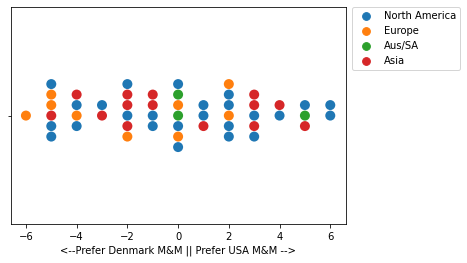

In [137]:
sns.swarmplot(data=pdf, x='mnm_skew',hue='continent_adj',
              size=10,y=[""]*len(pdf))
plt.xlabel("<--Prefer Denmark M&M || Prefer USA M&M -->")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

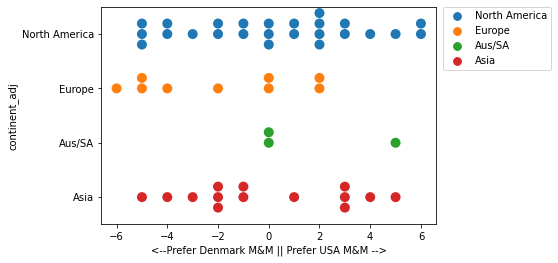

In [138]:
sns.swarmplot(data=pdf, x='mnm_skew',hue='continent_adj',
              size=10,y='continent_adj')
plt.xlabel("<--Prefer Denmark M&M || Prefer USA M&M -->")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

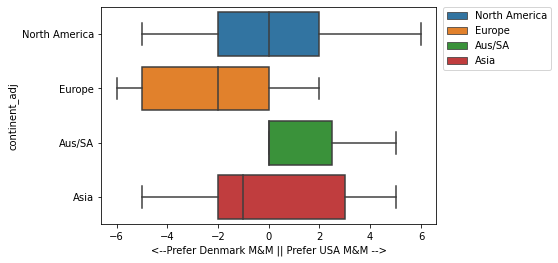

In [139]:
sns.boxplot(data=pdf, x='mnm_skew',y='continent_adj',hue='continent_adj',dodge=False)
plt.xlabel("<--Prefer Denmark M&M || Prefer USA M&M -->")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

What number should I focus on to highlight participant preference?
* The "skew": how much a participant leans USA vs Den, based on sum of responses - more positive is USA
* The "ratio": log2 of USA sum/Den sum - more positive is USA
* the "average": average of taste scores? Would this be meaningfully different than the sum?

Also, consider the variability of individual participants - ave std of responses? 0 is highly consistent

Can I now do a t-test for difference in M&M preference because it's now a distribution?
